In [21]:
import numpy as np
from numpy import pi
import pandas as pd
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import time

torch.manual_seed(42)

data = pd.read_csv('datasets/spiralsdataset.csv', header=None, names=['x1','x2','y'])
# data = pd.read_csv('datasets/variationspiralDataset.csv', header=None, names=['x1','x2','y'])

# Split into numpy arrays with features and labels
X = data[['x1', 'x2']].to_numpy()
y = data[['y']].to_numpy().flatten()



In [22]:
def Visualise(svm,size):
    # Visualise activations
        x1_min, x1_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
        x2_min, x2_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
        xx, yy = torch.meshgrid(torch.linspace(x1_min, x1_max, 100),
                                torch.linspace(x2_min, x2_max, 100))
        X_grid = torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)
        
        # Get the predicted_class class labels for the grid points
        with torch.no_grad():
            grid_outputs = svm.predict(X_grid)
            
        print(grid_outputs)
        
        return torch.tensor(grid_outputs)

In [23]:


def train_SVM(C, kernel, gamma, X, y):
    start_time = time.time()
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    fold_decisions = []
    train_scores = []
    test_scores = []
    time_fold = []
    fig, ax = plt.subplots(2, 5, figsize=(15, 6))
    ax = ax.ravel()
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        fold_start_time = time.time()
        svm = SVC(C=C, kernel=kernel, gamma=gamma)
        
        # Get the training and testing data for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the SVM on the training data
        svm.fit(X_train, y_train)

        # Get the training and testing accuracy for this fold
        y_train_pred = svm.predict(X_train)
        y_test_pred = svm.predict(X_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        train_scores.append(train_acc)
        test_scores.append(test_acc)
        fold_end_time = time.time()
        time_fold.append(fold_end_time-fold_start_time)
        # Visualize the decision boundary for this fold
        # fold_decisions.append(Visualise(svm, 15))
        x1_min, x1_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
        x2_min, x2_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
        xx, yy = torch.meshgrid(torch.linspace(x1_min, x1_max, 100),
                                torch.linspace(x2_min, x2_max, 100))
        X_grid = torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)
        
        with torch.no_grad():
            grid_outputs = svm.predict(X_grid)
    
        ax[i].contourf(xx, yy, grid_outputs.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
        ax[i].set_title('Fold {}'.format(i+1))
        svm = None
    plt.tight_layout()
    plt.show()
    end_time = time.time()
    elapsed_time = end_time - start_time
    average_time = sum(time_fold)/10

    # Output the test accuracy and learning curve
    print("Average Test Accuracy: {:.2f}%".format(np.mean(test_scores) * 100))
    plt.plot(train_scores, label="Train")
    plt.plot(test_scores, label="Test")
    plt.title("Learning Curve")
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    print(f"Average Fold Time: {average_time:.2f} Time elapsed: {elapsed_time:.2f} seconds")


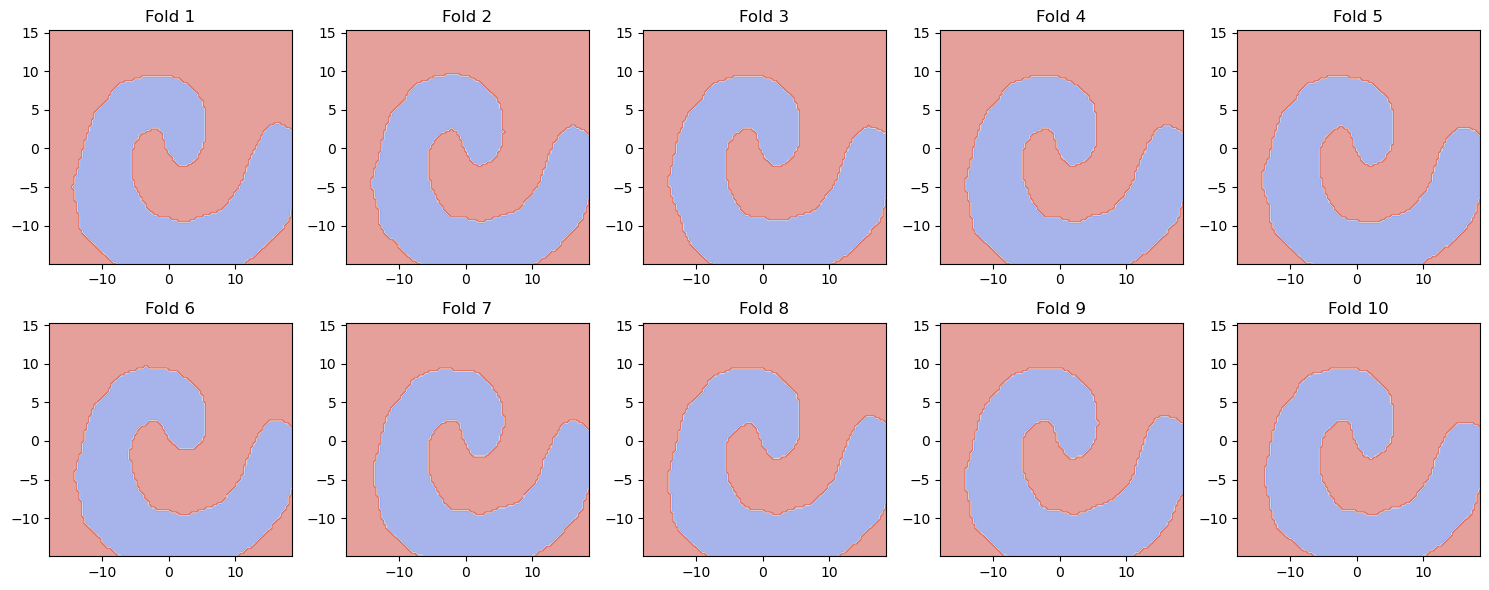

Average Test Accuracy: 100.00%


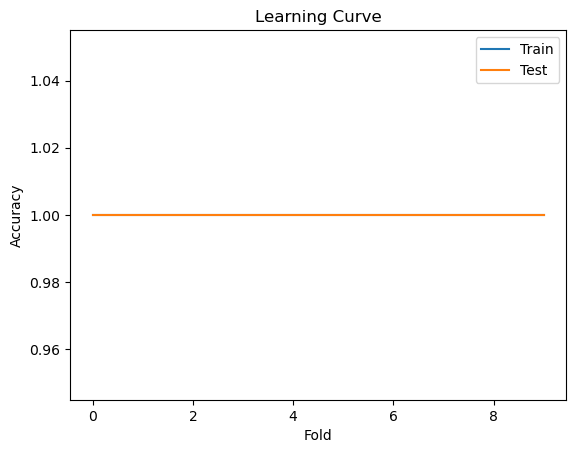

Average Fold Time: 0.07 Time elapsed: 7.00 seconds


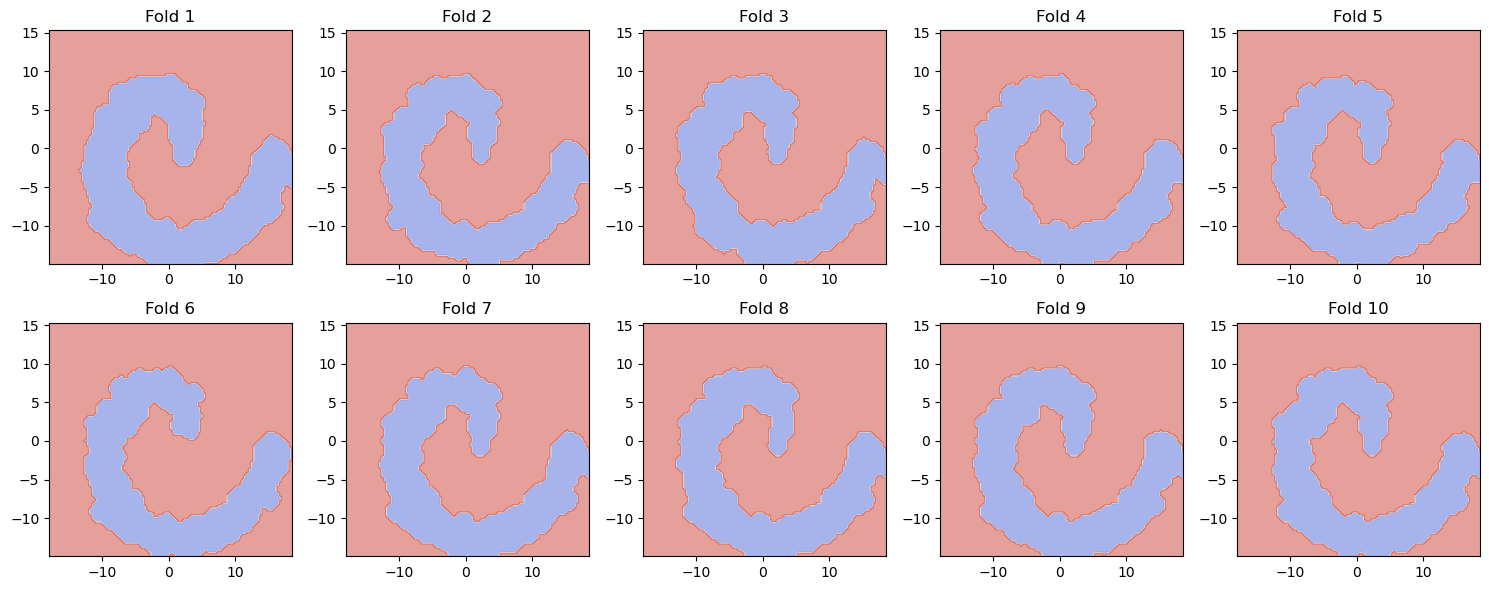

Average Test Accuracy: 99.50%


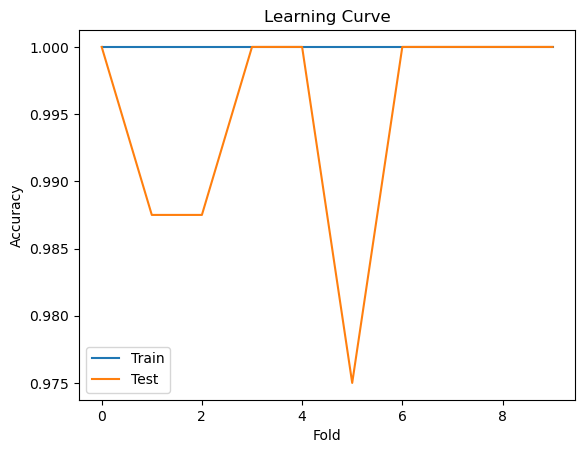

Average Fold Time: 0.10 Time elapsed: 9.09 seconds


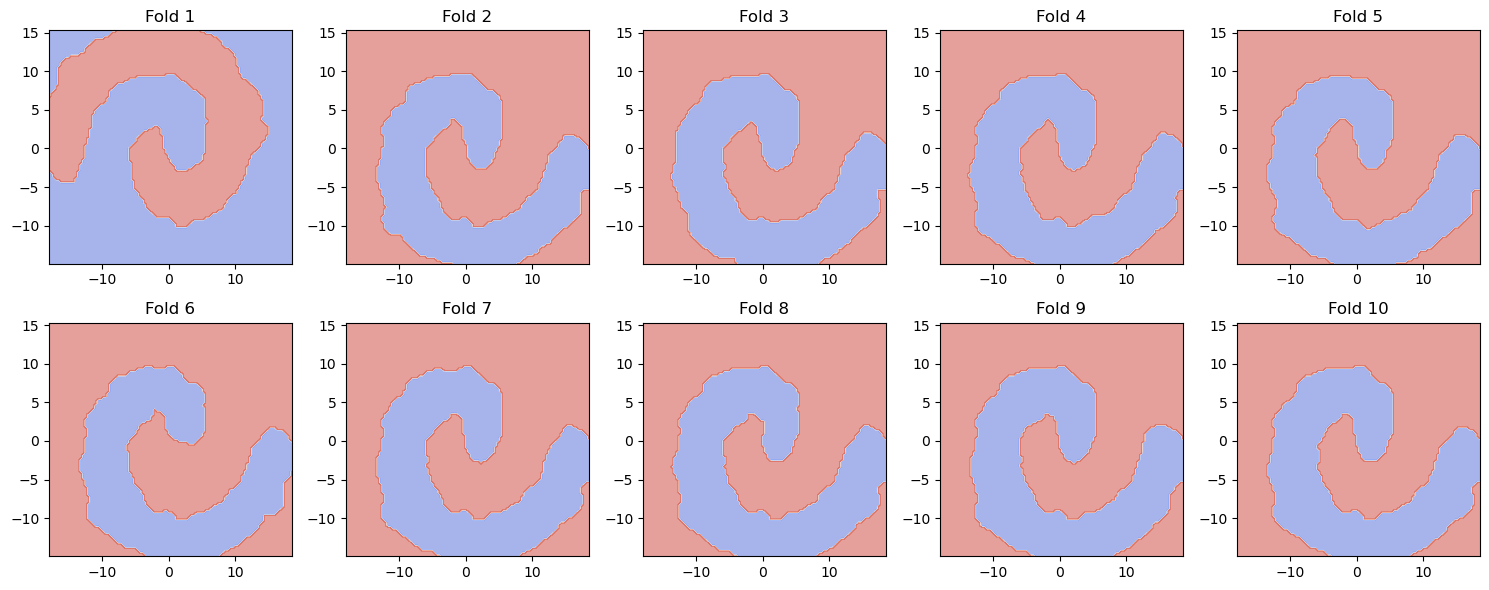

Average Test Accuracy: 99.75%


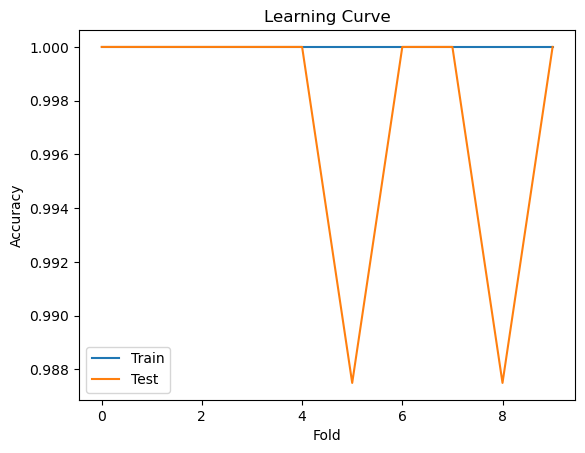

Average Fold Time: 0.07 Time elapsed: 6.32 seconds


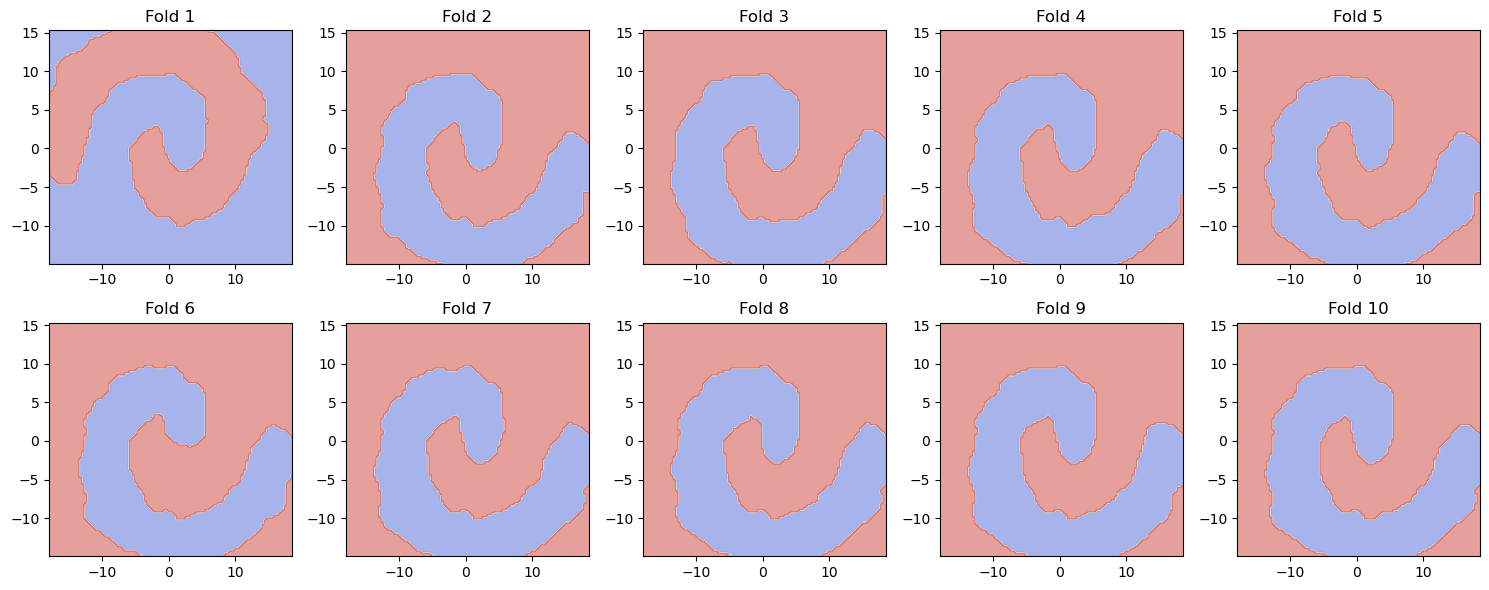

Average Test Accuracy: 99.75%


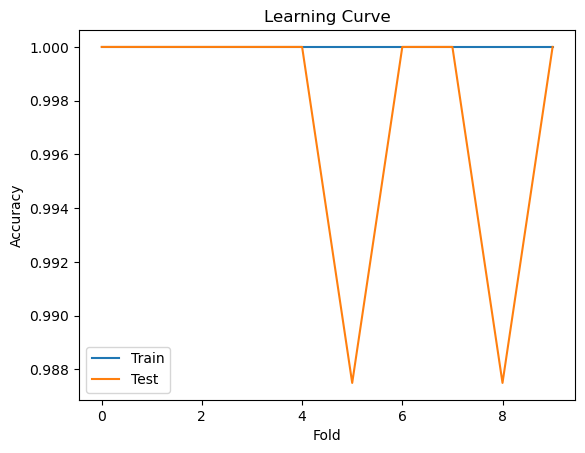

Average Fold Time: 0.07 Time elapsed: 5.89 seconds


In [25]:
train_SVM(0.1,"rbf",0.3,X,y)
train_SVM(1.8,"rbf",2,X,y)
train_SVM(2,"rbf",1,X,y)
train_SVM(3,"rbf",0.8,X,y)
